In [102]:
#COMP 551: Assignment 1: Getting Started with Machine Learning
#Group members: Maya Arvanitis, Marta Czinkoczky, Aidan Shoham-Amizlev

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [104]:
#References------------------------------------
#Tutorials:
#KNN Tutorial, Model Evaluation Tutorial, Pandas Tutorial

#Further references
# https://github.com/Suji04/ML_from_Scratch/blob/master/decision%20tree%20classification.ipynb


In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
!pip install tabulate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

#random seed for reproducibility
np.random.seed(50)

#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Task 1: Acquire, preprocess, and analyze the data

In [106]:
#National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset
#read csv file
df1 = pd.read_csv("/content/gdrive/My Drive/COMP551_A1_Datasets/NHANES_age_prediction.csv")

#print size of unclead df
print("Size of unclean data set for NHANES age prediction:" + str(df1.shape))

#remove missing values
df1_cleaned = df1[~df1.applymap(lambda x: x == '?').any(axis=1)]

#change column names
variables1 = ['SEQN_ID', "AGE","AGE_FL", "GENDER", " ACTIVITY_LVL", "BMI", "BLOOD_GLUC", "DIABETIC", "ORAL", "BLOOD_INS",]
df1_cleaned.columns = variables1

#Remove column with SEQN ID
df1_cleaned = df1_cleaned.drop('SEQN_ID', axis=1)

# Map "Adult" to 0 and "Senior" to 1 in 'AGE' column
df1_cleaned['AGE'] = df1_cleaned['AGE'].replace({'Adult': 0, 'Senior': 1})

#printing cleaned data set
print("Size of clean data set for NHANES age prediction: " + str(df1_cleaned.shape) + "\n")
display(df1_cleaned.head())


Size of unclean data set for NHANES age prediction:(2278, 10)
Size of clean data set for NHANES age prediction: (2278, 9)



,AGE,AGE_FL,GENDER,ACTIVITY_LVL,BMI,BLOOD_GLUC,DIABETIC,ORAL,BLOOD_INS
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [107]:
#Wisconsin Breast Cancer Dataset
breast_cancer_df = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df2 = pd.read_csv(breast_cancer_df, header=None)

#print size of unclean df
print("Size of unclean data set for Wisconsin Breast Cancer:" + str(df2.shape))

#remove missing values
df2_cleaned = df2[~df2.applymap(lambda x: x == '?').any(axis=1)]

#change column names
variables2 = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']
df2_cleaned.columns = variables2

#Remove column with sample_code_number
df2_cleaned = df2_cleaned.drop('Sample_code_number', axis=1)
#Move the class column to the front for formatting
columns = ['Class'] + [col for col in df2_cleaned.columns if col != 'Class']
df2_cleaned = df2_cleaned[columns]

#printing cleaned data set
print("Size of clean data set for Wisconsin Breast Cancer: " + str(df2_cleaned.shape) + "\n")
display(df2_cleaned.head())

Size of unclean data set for Wisconsin Breast Cancer:(699, 11)
Size of clean data set for Wisconsin Breast Cancer: (683, 10)



,Class,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


##Basic Statistics

In [108]:
# For NHANES dataset
print("NHANES Dataset Descriptive Statistics:")
display(df1_cleaned.describe())

print("\n" * 3)  # Adding extra space between the two tables

# For Wisconsin Breast Cancer dataset
print("Wisconsin Breast Cancer Dataset Descriptive Statistics:")
display(df2_cleaned.describe())

NHANES Dataset Descriptive Statistics:


,AGE,AGE_FL,GENDER,ACTIVITY_LVL,BMI,BLOOD_GLUC,DIABETIC,ORAL,BLOOD_INS
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,0.159789,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,0.366491,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,0.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,0.000000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,0.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,0.000000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,1.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000






Wisconsin Breast Cancer Dataset Descriptive Statistics:


,Class,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2.699854,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221
std,0.954592,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,4.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


##Visualizing Features: Histograms and Scatter Plots

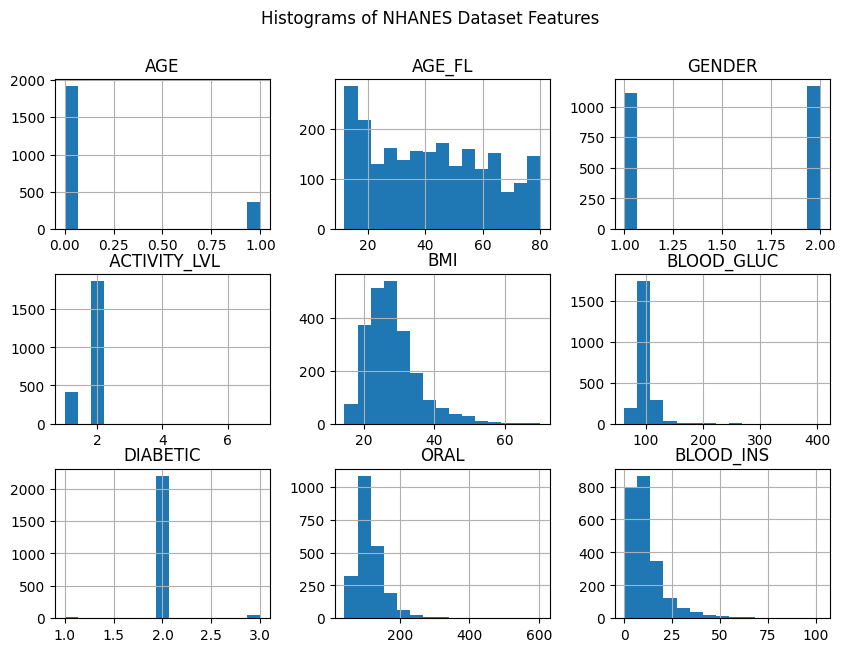

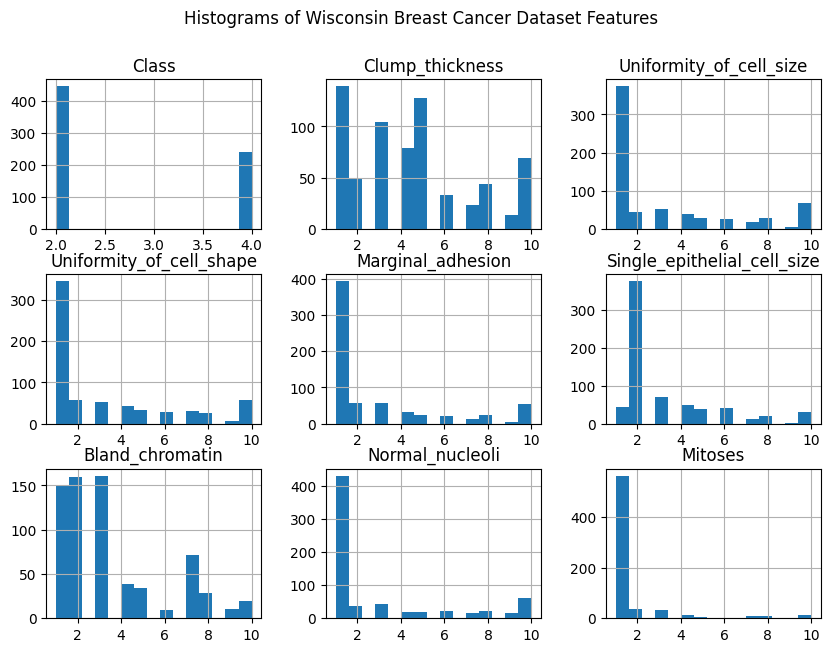

In [109]:
#Plotting the histograms for each feature
#NHANES Dataset
df1_cleaned.hist(bins=15, figsize=(10, 7))
plt.suptitle("Histograms of NHANES Dataset Features")
plt.show()

#Wisconsin Breast Cancer Dataset
df2_cleaned.hist(bins=15, figsize=(10, 7))
plt.suptitle("Histograms of Wisconsin Breast Cancer Dataset Features")
plt.show()

Plotting Scatterplots

In [110]:
#Commented this code out for now just due to long run time. Used some of figures.


#For Dataset 1
# sns.pairplot(df1_cleaned)
# plt.suptitle("Pairwise Scatter Plots - NHANES Dataset")
# plt.show()


#For Dataset 2
# sns.pairplot(df2_cleaned)
# plt.suptitle("Pairwise Scatter Plots - Wisconsin Breast Cancer Dataset")
# plt.show()

# Normalizing Data

In [111]:
#using MinMaxScaler from sklearn
scaler = MinMaxScaler()

#NHANES
df1_normalized = scaler.fit_transform(df1_cleaned)

#Wisconsin Breast Cancer
df2_normalized = scaler.fit_transform(df2_cleaned)


#Task 2: Implementing KNN and DT

##KNN Model

In [112]:
#Defining different distance metrics
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2) ** 2, axis=2))
manhattan = lambda x1, x2: np.sum(np.abs(x1-x2), axis=-1)

#Following code referenced from KNN Tutorial
class KNN():

  def __init__(self, K=1, dist_fn=euclidean):
    self.dist_fn = dist_fn
    self.K = K
    return

  def fit(self, x, y):
    #Storing the training data with this method
    self.x = x
    self.y = y.astype(int)  # Convert y to an integer array
    self.C = int(np.max(y)) + 1  # Convert to int
    return self

  def predict(self, x_test):
    #Make predictions using stored data and the test data given as argument
    num_test = x_test.shape[0]

    #calculating the distances between training and test samples
    #returns array of shape [num_test] [num_train] Broadcasting
    distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])

    # Debugging prints
    # print("Shape of self.x:", self.x.shape)
    # print("Shape of x_test:", x_test.shape)
    # print("Shape of distances:", distances.shape)

    #ith row of knns has the indices of k closest training samples to the ith test sample
    knns = np.zeros((num_test, self.K), dtype=int)

    #print(knns.shape, self.K)

    #ith row of y_prob has probability dist over C classes
    y_prob = np.zeros((num_test, self.C))

    for i in range(num_test):
      knns[i,:] = np.argsort(distances[i])[:self.K]
      y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counter for number of instances

    #dividing by K for probability dist
    y_prob /= self.K

    #Prints for debugging purposes
    # print(self.x)
    # print(x_test)
    # print(self.y)
    # print(y_prob.shape)

    return y_prob, knns



##DT Model

In [113]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # there are leaf nodes and decision nodes
        # a decision node contains a condition, which is defined by the feature index and threshold

        self.feature_index = feature_index  # for accessing the particular feature
        self.threshold = threshold          # threshold value for that particular feature

        # edges of the tree, allowing to move from parent node to children nodes
        self.left = left                    # for accessing the left child of the node
        self.right = right                  # for accessing the right child of the node

        # information gain calculated for the split by this particular decision node
        self.info_gain = info_gain

        # value of the leaf node, the majority class
        self.value = value

In [114]:
class DecisionTree():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree (to traverse through the tree)
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split  # if the number of samples reaches the minimum in a node - treat it as leaf node
        self.max_depth = max_depth                  # if the depth of the tree reaches the maximum

    def build_tree(self, dataset, curr_depth=0, cost_mode="entropy"):
        ''' recursive function to build the binary tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]        # split features and targets into X and Y
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.best_split(dataset, num_samples, num_features, cost_mode=cost_mode)
            # check if information gain is positive, no need to split further if node is already pure (= consists only one type of class)
            if best_split["info_gain"]>0:

                # recur left - create the left subtree via recursion (calling the build_tree function inside the build_tree function)
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1) # onces reaches the leaf node, moves on to the right subtree
                # recur right - create the right subtree via recursion (calling the build_tree function inside the build_tree function)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)

                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_node(Y)

        # return leaf node
        return Node(value=leaf_value)

    def best_split(self, dataset, num_samples, num_features, cost_mode="entropy"):
        ''' function to find the best split, returning a dictionary'''

        # initialize dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")   # because I want to maximize IG

        # loop over all the features (but since features are real numbers, dont loop through them all, only possible feature values)
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values) # unique values of all features to rtaverse through
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]  # extracting the target values
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, mode=cost_mode)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split library
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data into two parts'''

        # using list comprehensions
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])  # those datapoints that met the thereshold conditions, feature value less than threshold
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain based on two formulas '''

        weight_l = len(l_child) / len(parent) # relative sizes of child nodes with respoect to parent nodes
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child)) # logarithm is removed, so computationally less expensive
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    # the actual math formulas for given array of target variables
    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_node(self, Y):
        ''' function to compute leaf node '''

        # leaf value = majority class present in that node
        Y = list(Y)
        return max(Y, key=Y.count)

    # custom function to visualize decision tree based on Normalized Nerd's implementation
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "//", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y, cost_mode="entropy"):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset, cost_mode=cost_mode)  # calling the build tree function

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value  # if the node is a leaf node, just return the value
        feature_val = x[tree.feature_index]     # if it is not a leaf node, extract the feature value of the new datapoint at the given index
        if feature_val<=tree.threshold:         # and check whether it falls below or above the threshold to decide which subtree to recur over
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

##Evaluation

In [115]:
#Evaluate accuracy function
def evaluate_acc(self, y_true, y_predicted):
  return accuracy_score(y_true, y_predicted)

#Task 3: Running Experiments


###Split the Dataset

In [116]:
#First, we need to split the data set into the features and the labels for both dfs.

#NHANES age prediction Dataset ==============

#take the normalized data frame and extract the features vs. labels
# Convert the NumPy array to a DataFrame
df1_normalized_df = pd.DataFrame(df1_normalized, columns=df1_cleaned.columns)

#drop the label
x_agepredict = df1_normalized_df.drop('AGE', axis=1)

#AGE is our target
y_agepredict = df1_normalized_df['AGE']

#Breast Cancer Wisconsin Dataset ==============

#take the normalized data frame and extract the features vs. labels
# Convert the NumPy array to a DataFrame
df2_normalized_df = pd.DataFrame(df2_normalized, columns=df2_cleaned.columns)

#drop the label
x_breastcancer = df2_normalized_df.drop('Class', axis=1)

#Class is our target
y_breastcancer = df2_normalized_df['Class']

# NHANES age prediction Dataset ==============
print("NHANES Age Prediction Dataset Features:")
display(x_agepredict.head())

print("\nNHANES Age Prediction Dataset Labels:")
display(y_agepredict.head())

# Breast Cancer Wisconsin Dataset ==============
print("\nBreast Cancer Wisconsin Dataset Features:")
display(x_breastcancer.head())

print("\nBreast Cancer Wisconsin Dataset Labels:")
display(y_breastcancer.head())


NHANES Age Prediction Dataset Features:


,AGE_FL,GENDER,ACTIVITY_LVL,BMI,BLOOD_GLUC,DIABETIC,ORAL,BLOOD_INS
0,0.720588,1.0,0.166667,0.381295,0.137427,0.5,0.195035,0.144591
1,0.205882,1.0,0.166667,0.104317,0.076023,0.5,0.070922,0.036319
2,0.058824,0.0,0.166667,0.156475,0.076023,0.5,0.049645,0.058737
3,0.294118,0.0,0.166667,0.258993,0.119883,0.5,0.078014,0.156730
4,0.382353,1.0,0.000000,0.384892,0.116959,0.5,0.072695,0.105531



NHANES Age Prediction Dataset Labels:


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AGE, dtype: float64


Breast Cancer Wisconsin Dataset Features:


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0



Breast Cancer Wisconsin Dataset Labels:


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

##3.1 KNN

Now that we have separated our features and labels we must split our dataset x and y into training and test sets. Then, we can put these split sets into arrays. We will be using an 80:20 split (80% training and 20% testing).

In [117]:
#Split the NHANES age prediction dataset using train_test_split function
x_train_agepredict, x_test_agepredict, y_train_agepredict, y_test_agepredict = train_test_split(
    x_agepredict, y_agepredict, test_size=0.20, random_state=0)

#Split the Wisconsin Breast Cancer dataset using train_test_split function
x_train_breastcancer, x_test_breastcancer, y_train_breastcancer, y_test_breastcancer = train_test_split(
    x_breastcancer, y_breastcancer, test_size=0.20, random_state=0)

#Printing shapes to verify splitting
print("Shape of Age Prediction Training X")
print(x_train_agepredict.shape)
print("Shape of Age Prediction Testing X")
print(x_test_agepredict.shape)

print("Shape of Age Prediction Training Y")
print(y_train_agepredict.shape)
print("Shape of Age Prediction Testing Y")
print(y_test_agepredict.shape)

print("Shape of Breast Cancer Training X")
print(x_train_breastcancer.shape)
print("Shape of Breast Cancer Testing X")
print(x_test_breastcancer.shape)

print("Shape of Breast Cancer Training Y")
print(y_train_breastcancer.shape)
print("Shape of Breast Cancer Testing Y")
print(y_test_breastcancer.shape)

#Convert all dataframes into numpy arrays
x_train_agepredict = x_train_agepredict.to_numpy()
x_test_agepredict = x_test_agepredict.to_numpy()
y_train_agepredict = y_train_agepredict.to_numpy()
y_test_agepredict = y_test_agepredict.to_numpy()

x_train_breastcancer = x_train_breastcancer.to_numpy()
x_test_breastcancer = x_test_breastcancer.to_numpy()
y_train_breastcancer = y_train_breastcancer.to_numpy()
y_test_breastcancer = y_test_breastcancer.to_numpy()

Shape of Age Prediction Training X
(1822, 8)
Shape of Age Prediction Testing X
(456, 8)
Shape of Age Prediction Training Y
(1822,)
Shape of Age Prediction Testing Y
(456,)
Shape of Breast Cancer Training X
(546, 9)
Shape of Breast Cancer Testing X
(137, 9)
Shape of Breast Cancer Training Y
(546,)
Shape of Breast Cancer Testing Y
(137,)


##Experiment 1.1 Choosing hyperparameter K

Now that we have split our data, we will perform testing to choose hyperparameter K.

best K = 7
training accuracy = 0.9890230515916575
validation accuracy = 0.973655323819978
test accuracy = 0.9714912280701754


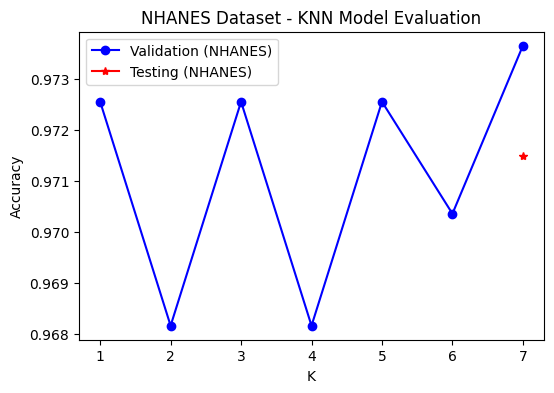

best K = 6
training accuracy = 0.9802414928649835
validation accuracy = 0.9816849816849816
test accuracy = 0.9562043795620438


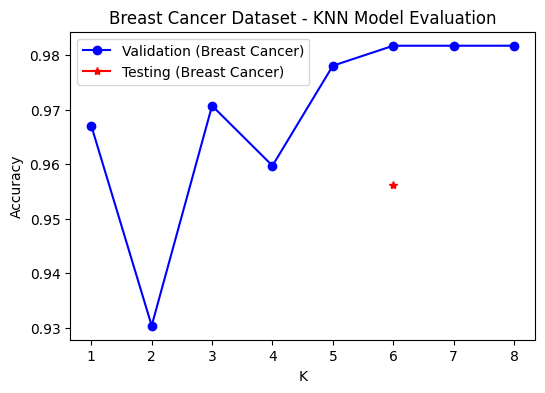

In [118]:
# For NHANES age prediction dataset ================================================
x_train, y_train = x_train_agepredict, y_train_agepredict

# Further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:len(x_train)//2], y_train[:len(y_train)//2]
x_train_va, y_train_va = x_train[len(x_train)//2:], y_train[len(y_train)//2:]

model_choices = []
valid_acc = []
train_acc = []

n_valid = y_train_va.shape[0]

#Referring to KNN tutorial
for k in range(1, 8): #The NHANES dataset has 8 features
    knn = KNN(K=k, dist_fn = euclidean)  # create a KNN object (OOP)

    # Training accuracy calculation
    y_train_tr_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    train_accuracy = np.sum(y_train_tr_pred == y_train_tr) / len(y_train_tr)

    y_train_va_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)  # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va) / n_valid

    model_choices.append(k)
    valid_acc.append(accuracy)
    train_acc.append(train_accuracy)

# Use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob, _ = knn.fit(x_train, y_train).predict(x_test_agepredict)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test_agepredict) / y_test_agepredict.shape[0]

#Printing training, validation and test accuracies
print(f'best K = {best_valid_K}')
print(f'training accuracy = {train_acc[model_choices.index(best_valid_K)]}')
print(f'validation accuracy = {max(valid_acc)}')
print(f'test accuracy = {test_accuracy}')

# NHANES age prediction dataset plot
plt.figure(figsize=(6, 4))  # Create a new figure for NHANES dataset
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='Validation (NHANES)')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='Testing (NHANES)')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("NHANES Dataset - KNN Model Evaluation")
plt.legend(loc='best')
plt.savefig('nhanes_agepredict_KNN_chooseK.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot

# For Breast Cancer Dataset ================================================
x_train, y_train = x_train_breastcancer, y_train_breastcancer

# Further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:len(x_train)//2], y_train[:len(y_train)//2]
x_train_va, y_train_va = x_train[len(x_train)//2:], y_train[len(y_train)//2:]

model_choices = []
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1, 9): #The Breast Cancer dataset has 9 features
    knn = KNN(K=k, dist_fn = euclidean)  # create a KNN object (OOP)

     # Training accuracy calculation
    y_train_tr_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    train_accuracy = np.sum(y_train_tr_pred == y_train_tr) / len(y_train_tr)

    y_train_va_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)  # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va) / n_valid

    train_acc.append(train_accuracy)
    model_choices.append(k)
    valid_acc.append(accuracy)

# Use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob, _ = knn.fit(x_train, y_train).predict(x_test_breastcancer)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test_breastcancer) / y_test_breastcancer.shape[0]

#Printing training, validation and test accuracies
print(f'best K = {best_valid_K}')
print(f'training accuracy = {train_acc[model_choices.index(best_valid_K)]}')
print(f'validation accuracy = {max(valid_acc)}')
print(f'test accuracy = {test_accuracy}')


# Breast Cancer dataset plot
plt.figure(figsize=(6, 4))  # Create a new figure for Breast Cancer dataset
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='Validation (Breast Cancer)')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='Testing (Breast Cancer)')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Dataset - KNN Model Evaluation")
plt.legend(loc='best')
plt.savefig('breastcancer_KNN_chooseK.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot


##Determine correlations of features

Now, we will determine the correlation of features for both datasets with the target. KNN will be implemented using the optimized K found previously for each dataset and with the Euclidean distance metric.

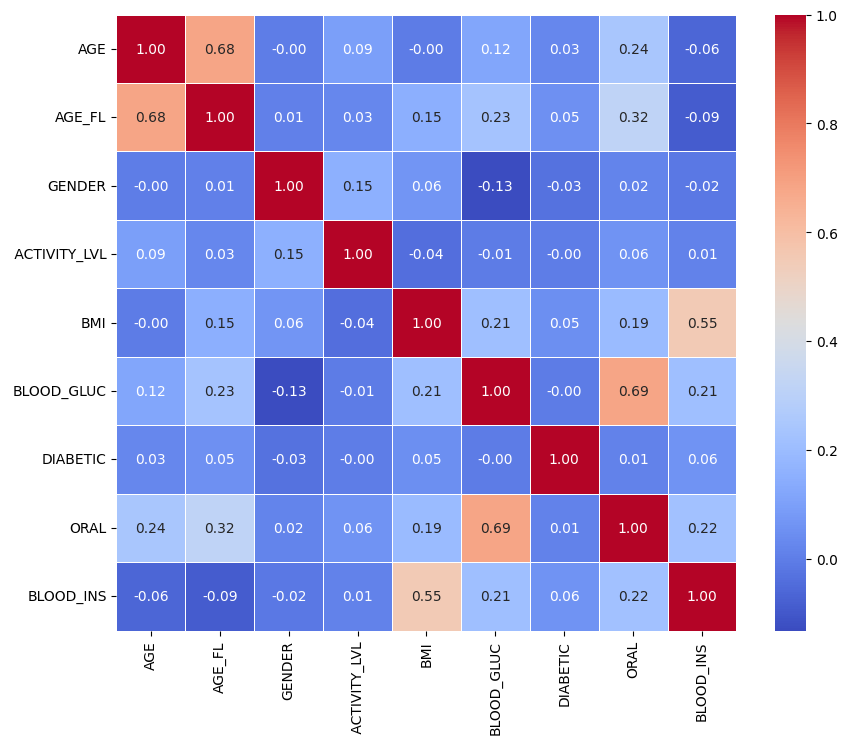

Shape of test set: (456, 8)
Number of predictions: 456


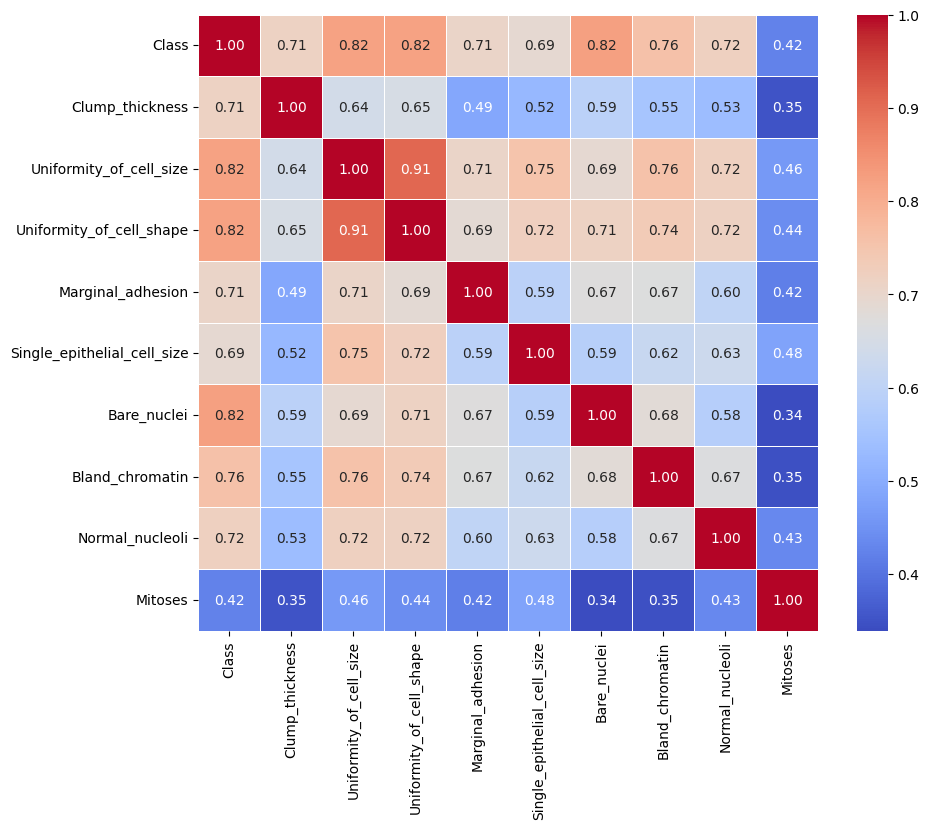

Shape of test set: (137, 9)
Number of predictions: 137


In [119]:
#NHANES dataset -------------------------------------
#creating a correlation matrix for df1 (NHANES)
correlation_matrix = df1_normalized_df.corr()

plt.figure(figsize=(10, 8))

#using seaborns' heatmap to visualize data with colour
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

knn = KNN(K=7, dist_fn=euclidean)  #Using optimized k = 7 with Euclidean
knn.fit(x_train_agepredict, y_train_agepredict)
y_prob, knns = knn.predict(x_test_agepredict)
y_pred = np.argmax(y_prob, axis=1)

#Debugging purposes
print("Shape of test set:", x_test_agepredict.shape)
print("Number of predictions:", len(y_pred))

#Breast Cancer Dataset -------------------------------------
#Creating a correlation matrix for df2 (Breast Cancer)
correlation_matrix = df2_normalized_df.corr()

plt.figure(figsize=(10, 8))

#using seaborns' heatmap to visualize data with colour
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

knn = KNN(K=6, dist_fn=euclidean)  #Using optimized k = 6 with Euclidean
knn.fit(x_train_breastcancer, y_train_breastcancer)
y_prob, knns = knn.predict(x_test_breastcancer)
y_pred = np.argmax(y_prob, axis=1)

print("Shape of test set:", x_test_breastcancer.shape)
print("Number of predictions:", len(y_pred))


#Debugging purposes
# print(x_test_agepredict.shape)
# predictions = knn.predict(x_test_agepredict)
# print(len(predictions))
# print(knn)
# knn = KNN()  # Adjust parameters as needed
# knn.fit(x_train_agepredict, y_train_agepredict)  # Make sure X_train and y_train are correctly defined


We find that for Dataset 1, ORAL and BLOOD_GLUC are in highest correlation with the target (0.24 and 0.12 respectively). For Dataset 2, Uniformity of cell size, shape and Bare nuclei all have correlation 0.82. Arbitrarily we selected cell shape and bare nuclei to further visualize below.

###Further Data Visualization

instances (N) 	 2278 
 features (D) 	 2 
 classes (C) 	 2.0
instances (N) 	 683 
 features (D) 	 2 
 classes (C) 	 2.0


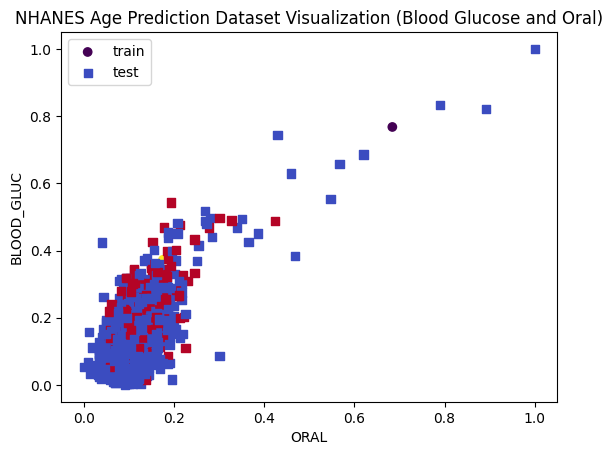

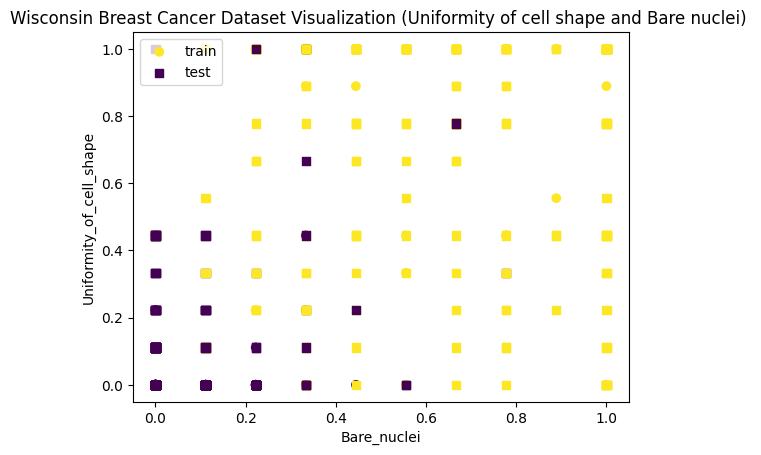

In [120]:
#For NHANES Age Prediction Dataset
# we have that x_agepredict is shape (2278,8) and y_agepredict shape (2278)
#first convert to Dfs to numpy arrays
x_agepredict = x_agepredict.to_numpy()
y_agepredict = y_agepredict.to_numpy()

# we are getting the two columns of ORAL (col 7, index 6) and BLOOD_GLUC (col 5, 4 index) of x_agepredict which are
x, y = x_agepredict[:, [4, 6]], y_agepredict

#print the feature shape and classes of dataset
(N,D), C = x.shape, np.max(y)+1

inds = np.random.permutation(N)      #generates an indices array from 0 to N-1 and permutes it

#split the dataset into train and test
x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]

#visualization of the data
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='viridis', marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='coolwarm', marker='s', label='test')
plt.legend()
plt.ylabel('BLOOD_GLUC')
plt.xlabel('ORAL')
plt.title("NHANES Age Prediction Dataset Visualization (Blood Glucose and Oral)")  # Title
# plt.show()
plt.savefig('age_prediction.png', dpi=300)

#For Wisconsin Breast Cancer Dataset==========================
#We have that x_breastcancer has a shape of (683,9) and y_breastcancer (683,)

#first convert to Dfs to numpy arrays
x_breastcancer = x_breastcancer.to_numpy()
y_breastcancer = y_breastcancer.to_numpy()

# we are getting the column for Uniformity_of_cell_shape (Column 3, index 2) and Bare_nuclei (column 6, index 5)
x, y = x_breastcancer[:, [2,5]], y_breastcancer

#print the feature shape and classes of dataset
(N,D), C = x.shape, np.max(y)+1

inds = np.random.permutation(N)      #generates an indices array from 0 to N-1 and permutes it

#split the dataset into train and test
x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]

#visualization of the data
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('Uniformity_of_cell_shape')
plt.xlabel('Bare_nuclei')
plt.title("Wisconsin Breast Cancer Dataset Visualization (Uniformity of cell shape and Bare nuclei) ")  # Title
# plt.show()
plt.savefig('breastcancer.png', dpi=300)

Shape of Age Prediction Training X: (1822, 2)
Shape of Age Prediction Testing X: (456, 2)
knns shape: (583, 1)
y_prob shape: (583, 2)
accuracy is 94.5.


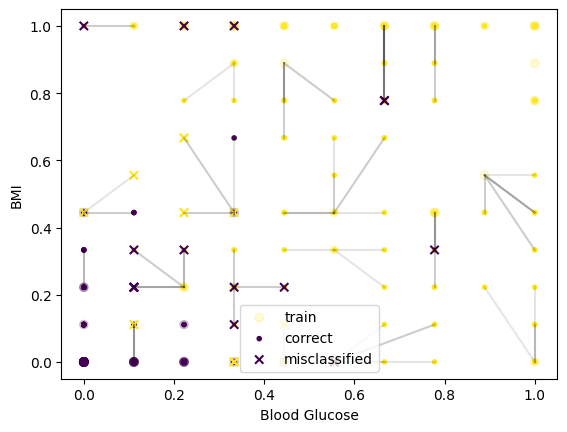

In [121]:
#Reference KNN Tutorial
x_agepredict_selected = x_agepredict[:, [4, 6]]  # Selecting only the two specific columns

x_train_agepredict_fit, x_test_agepredict_fit, y_train_agepredict_fit, y_test_agepredict_fit = train_test_split(
    x_agepredict_selected, y_agepredict, test_size=0.20, random_state=0)

print("Shape of Age Prediction Training X:", x_train_agepredict_fit.shape)
print("Shape of Age Prediction Testing X:", x_test_agepredict_fit.shape)

myK = 1 #took first closest neighbour

model = KNN(K=myK)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob, axis=-1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)

plt.ylabel('BMI')
plt.xlabel('Blood Glucose')
plt.legend()
plt.savefig('NHANES_age_prediction'+str(myK)+'.png',dpi=300,bbox_inches='tight')
# plt.show()

##Experiment 1.2 Changing Distance Functions (Manhattan vs. Euclidean)

Previously we computed the hyperparameter using the euclidean distance function. Now we will experiment with using the manhattan distance function instead.

best K = 3
training accuracy = 0.9923161361141603
validation accuracy = 0.9791437980241493
test accuracy = 0.9846491228070176


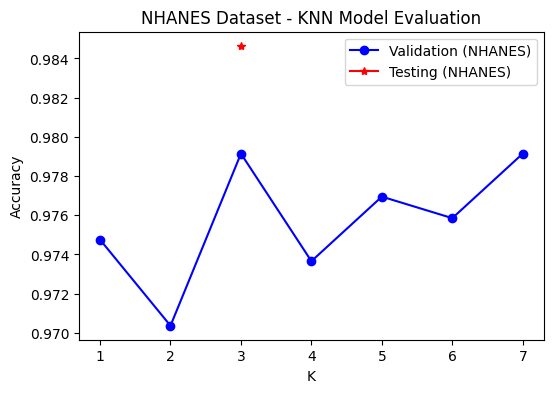

best K = 1
training accuracy = 1.0
validation accuracy = 0.9743589743589743
test accuracy = 0.9635036496350365


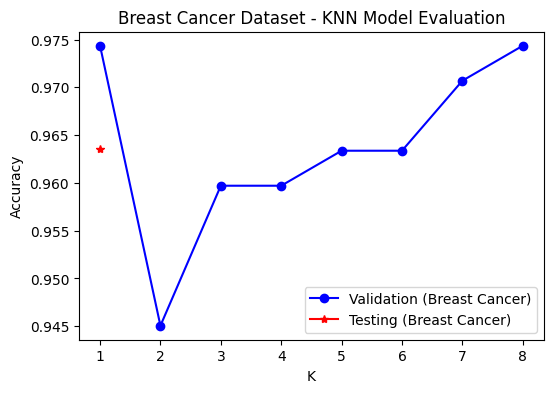

In [122]:
# For NHANES age prediction dataset ================================================
x_train, y_train = x_train_agepredict, y_train_agepredict

# Further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:len(x_train)//2], y_train[:len(y_train)//2]
x_train_va, y_train_va = x_train[len(x_train)//2:], y_train[len(y_train)//2:]

model_choices = []
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1, 8): #The NHANES dataset has 8 features
    knn = KNN(K=k, dist_fn = manhattan)  # create a KNN object (OOP)

     # Training accuracy calculation
    y_train_tr_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    train_accuracy = np.sum(y_train_tr_pred == y_train_tr) / len(y_train_tr)

    y_train_va_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)  # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)

    accuracy = np.sum(y_train_va_pred == y_train_va) / n_valid
    model_choices.append(k)
    valid_acc.append(accuracy)
    train_acc.append(train_accuracy)

# Use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob, _ = knn.fit(x_train, y_train).predict(x_test_agepredict)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test_agepredict) / y_test_agepredict.shape[0]
print(f'best K = {best_valid_K}')
print(f'training accuracy = {train_acc[model_choices.index(best_valid_K)]}')
print(f'validation accuracy = {max(valid_acc)}')
print(f'test accuracy = {test_accuracy}')


# NHANES age prediction dataset plot
plt.figure(figsize=(6, 4))  # Create a new figure for NHANES dataset
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='Validation (NHANES)')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='Testing (NHANES)')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("NHANES Dataset - KNN Model Evaluation")
plt.legend(loc='best')
plt.savefig('nhanes_agepredict_KNN_chooseK.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot

# For Breast Cancer Dataset ================================================
x_train, y_train = x_train_breastcancer, y_train_breastcancer

# Further split the training data into 50% training and 50% validation
x_train_tr, y_train_tr = x_train[:len(x_train)//2], y_train[:len(y_train)//2]
x_train_va, y_train_va = x_train[len(x_train)//2:], y_train[len(y_train)//2:]

model_choices = []
valid_acc = []

n_valid = y_train_va.shape[0]

for k in range(1, 9): #The Breast Cancer dataset has 9 features
    knn = KNN(K=k, dist_fn = manhattan)  # create a KNN object (OOP)

    y_train_tr_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_tr)
    y_train_tr_pred = np.argmax(y_train_tr_prob, axis=-1)
    train_accuracy = np.sum(y_train_tr_pred == y_train_tr) / len(y_train_tr)

    y_train_va_prob, _ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)  # bug fixed
    y_train_va_pred = np.argmax(y_train_va_prob, axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va) / n_valid

    model_choices.append(k)
    train_acc.append(train_accuracy)
    valid_acc.append(accuracy)

# Use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob, _ = knn.fit(x_train, y_train).predict(x_test_breastcancer)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = np.sum(y_test_pred == y_test_breastcancer) / y_test_breastcancer.shape[0]
print(f'best K = {best_valid_K}')
print(f'training accuracy = {train_acc[model_choices.index(best_valid_K)]}')
print(f'validation accuracy = {max(valid_acc)}')
print(f'test accuracy = {test_accuracy}')


# Breast Cancer dataset plot
plt.figure(figsize=(6, 4))  # Create a new figure for Breast Cancer dataset
plt.plot(model_choices, valid_acc, marker='o', color='blue', label='Validation (Breast Cancer)')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='Testing (Breast Cancer)')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Dataset - KNN Model Evaluation")
plt.legend(loc='best')
plt.savefig('breastcancer_KNN_chooseK.png', dpi=300, bbox_inches='tight')
plt.show()  # Display the plot

We do observe differences in optimization of K for the euclidean distance function vs. the manhattan function. For the NHANES age prediction dataset we find for Euclidean an optimized k = 7 with test accuracy ~ 97%. With Manhattan we find an optimized k = 3 with test accuracy at ~ 98%.

For the Wisconsin Breast Cancer dataset we find for Euclidean an optimized k = 6 with test accuracy ~ 96%. With Manhattan we find an optimized k = 1 with test accuracy ~ 96%.

Calculating confusion Matrices

In [123]:
#computing confusion matrix for TN, FP, FN and TP
cm = confusion_matrix(y_test_breastcancer, y_test_pred)

cm_df = pd.DataFrame(cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                  84                   3
Actual Positive                   2                  48


Create ROC Curve for Predictions of Breast Cancer and NHANES Datasets

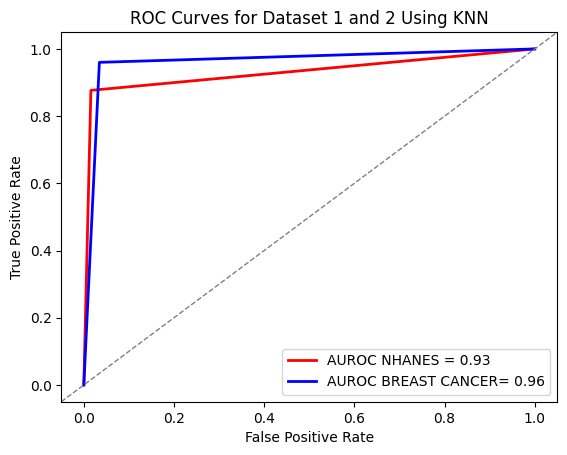

In [124]:
#Referenced Model Evaluation Tutorial
knn = KNN() # create a KNN object (OOP)
knn.fit(x_train_agepredict, y_train_agepredict)

predictions_age, _ = knn.predict(x_test_agepredict)
y_test_prob_age = predictions_age[:, 1]
fpr_age, tpr_age, thresholds_age = roc_curve(y_test_agepredict, y_test_prob_age)
roc_auc_age = roc_auc_score(y_test_agepredict, y_test_prob_age)


knn = KNN() # create a KNN object (OOP)
knn.fit(x_train_breastcancer, y_train_breastcancer)
# column 0 is healthy (benign)
# column 1 is cancer (malignant)
predictions_bc, _ = knn.predict(x_test_breastcancer)
y_test_prob_bc = predictions_bc[:, 1]
fpr_bc, tpr_bc, thresholds_bc = roc_curve(y_test_breastcancer, y_test_prob_bc)
roc_auc_bc = roc_auc_score(y_test_breastcancer, y_test_prob_bc)

plt.clf()

plt.plot(fpr_age, tpr_age, "r-", lw=2, label="AUROC NHANES = %0.2f"%roc_auc_age)
plt.plot(fpr_bc, tpr_bc, "b-", lw=2, label="AUROC BREAST CANCER= %0.2f"%roc_auc_bc)

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Dataset 1 and 2 Using KNN')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

## Train-Test split

In [125]:
# df1_normalized_df
df1_X = df1_normalized_df.iloc[:, 1:].values
df1_Y = df1_normalized_df.iloc[:, 0].values.reshape(-1, 1)

# df2_normalized_df
df2_X = df2_normalized_df.iloc[:, 1:].values
df2_Y = df2_normalized_df.iloc[:, 0].values.reshape(-1, 1)

# use train_test_split to split the datasets
df1_X_train, df1_X_test, df1_Y_train, df1_Y_test = train_test_split(df1_X, df1_Y, test_size=.2, random_state=41)
df2_X_train, df2_X_test, df2_Y_train, df2_Y_test = train_test_split(df2_X, df2_Y, test_size=.2, random_state=41)

## Fit the model
with Gini cost function

In [126]:
# for Age Prediction dataset
df1_classifier = DecisionTree(min_samples_split=3, max_depth=3)
df1_classifier.fit(df1_X_train,df1_Y_train, cost_mode="gini")
df1_classifier.print_tree()

# for Breast Cancer Prediction dataset
df2_classifier = DecisionTree(min_samples_split=3, max_depth=3)
df2_classifier.fit(df2_X_train,df2_Y_train, cost_mode="gini")
df2_classifier.print_tree()

X_0 <= 0.7647058823529411 // 0.275822036073313
 left:0.0
 right:1.0
X_1 <= 0.1111111111111111 // 0.3487699066940749
 left:X_5 <= 0.1111111111111111 // 0.09849034987938218
  left:X_0 <= 0.6666666666666665 // 0.02482682918200558
    left:0.0
    right:0.0
  right:X_0 <= 0.2222222222222222 // 0.5423605901745405
    left:0.0
    right:X_6 <= 0.1111111111111111 // 0.40671537676968755
        left:0.0
        right:1.0
 right:X_2 <= 0.1111111111111111 // 0.16865153125773358
  left:X_0 <= 0.4444444444444445 // 0.6962122601251458
    left:0.0
    right:1.0
  right:X_1 <= 0.3333333333333333 // 0.06481852593430812
    left:X_5 <= 0.2222222222222222 // 0.21908044193517462
        left:0.0
        right:1.0
    right:X_6 <= 0.3333333333333333 // 0.025337779893978216
        left:1.0
        right:1.0


## Test the model

In [127]:
df1_Y_true = df1_Y_test.flatten()  # flatten them
df2_Y_true = df2_Y_test.flatten()

# df1_Y_test and df2_Y_test = true labels for the test sets
df1_Y_pred = np.array(df1_classifier.predict(df1_X_test))
df2_Y_pred = np.array(df2_classifier.predict(df2_X_test))

from sklearn.metrics import accuracy_score

# evaluate accuracy of DT on both datasets
df1_accuracy = accuracy_score(df1_Y_true, df1_Y_pred)
print("Accuracy of DT on AgePrediction dataset:", df1_accuracy)

df2_accuracy = accuracy_score(df2_Y_true, df2_Y_pred)
print("Accuracy of DT on BreastCancer dataset:", df2_accuracy)

Accuracy of DT on AgePrediction dataset: 1.0
Accuracy of DT on BreastCancer dataset: 0.9343065693430657


AUROC

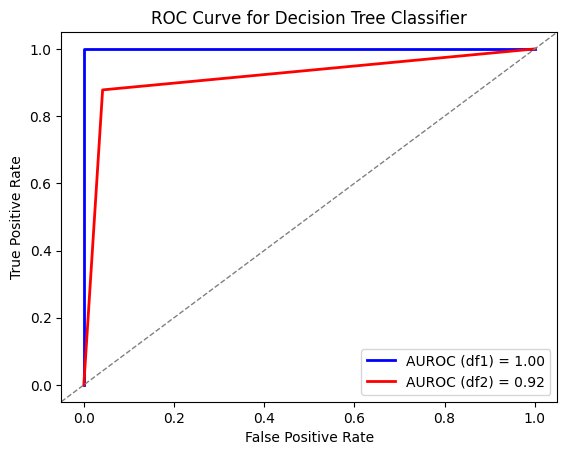

In [128]:
# define decision function
def decision_function(x, tree):
    ''' function to obtain decision function value for a single data point '''
    if tree.value is not None:
        # assuming binary classification
        return [1 - tree.value, tree.value]

    feature_val = x[tree.feature_index]
    if feature_val <= tree.threshold:
        return decision_function(x, tree.left)
    else:
        return decision_function(x, tree.right)

# saving the predicted probabilities via applying the above defined decision function
df1_Y_pred_prob = np.array([decision_function(x, df1_classifier.root)[1] for x in df1_X_test])
df2_Y_pred_prob = np.array([decision_function(x, df2_classifier.root)[1] for x in df2_X_test])

# calculating ROC curve
fpr_df1, tpr_df1, thresholds_df1 = roc_curve(df1_Y_true, df1_Y_pred_prob)
fpr_df2, tpr_df2, thresholds_df2 = roc_curve(df2_Y_true, df2_Y_pred_prob)

# calculating ROC AUC
roc_auc_df1 = roc_auc_score(df1_Y_true, df1_Y_pred_prob)
roc_auc_df2 = roc_auc_score(df2_Y_true, df2_Y_pred_prob)

# plotting ROC curves
plt.plot(fpr_df1, tpr_df1, "b-", lw=2, label="AUROC (df1) = %0.2f" % roc_auc_df1) # blue
plt.plot(fpr_df2, tpr_df2, "r-", lw=2, label="AUROC (df2) = %0.2f" % roc_auc_df2) # red

# adding a diagonal dashed line for reference
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')

# setting the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="best")

# saving & showing the plot
plt.savefig("roc_curve_decision_tree.png", bbox_inches='tight', dpi=300)
plt.show()

with Entropy cost function

In [129]:
# Age Prediction dataset
df1_classifier = DecisionTree(min_samples_split=3, max_depth=3)
df1_classifier.fit(df1_X_train,df1_Y_train)
df1_classifier.print_tree()

# Breast Cancer Prediction dataset
df2_classifier = DecisionTree(min_samples_split=3, max_depth=3)
df2_classifier.fit(df2_X_train,df2_Y_train)
df2_classifier.print_tree()

X_0 <= 0.7647058823529411 // 0.6466129120327698
 left:0.0
 right:1.0
X_1 <= 0.1111111111111111 // 0.6282867537977715
 left:X_5 <= 0.1111111111111111 // 0.09849034987938218
  left:X_0 <= 0.6666666666666665 // 0.02482682918200558
    left:0.0
    right:0.0
  right:X_0 <= 0.2222222222222222 // 0.5423605901745405
    left:0.0
    right:X_6 <= 0.1111111111111111 // 0.40671537676968755
        left:0.0
        right:1.0
 right:X_2 <= 0.1111111111111111 // 0.16865153125773358
  left:X_0 <= 0.4444444444444445 // 0.6962122601251458
    left:0.0
    right:1.0
  right:X_1 <= 0.3333333333333333 // 0.06481852593430812
    left:X_5 <= 0.2222222222222222 // 0.21908044193517462
        left:0.0
        right:1.0
    right:X_6 <= 0.3333333333333333 // 0.025337779893978216
        left:1.0
        right:1.0


In [130]:
df1_Y_true = df1_Y_test.flatten()  # flatten them
df2_Y_true = df2_Y_test.flatten()

# saving predicted labels (df1_Y_test and df2_Y_test = the true labels for the test sets)
df1_Y_pred = np.array(df1_classifier.predict(df1_X_test))
df2_Y_pred = np.array(df2_classifier.predict(df2_X_test))

from sklearn.metrics import accuracy_score

# evaluating accuracy
df1_accuracy = accuracy_score(df1_Y_true, df1_Y_pred)
print("Accuracy of DT on AgePrediction dataset:", df1_accuracy)

df2_accuracy = accuracy_score(df2_Y_true, df2_Y_pred)
print("Accuracy of DT on BreastCancer dataset:", df2_accuracy)

Accuracy of DT on AgePrediction dataset: 1.0
Accuracy of DT on BreastCancer dataset: 0.9343065693430657


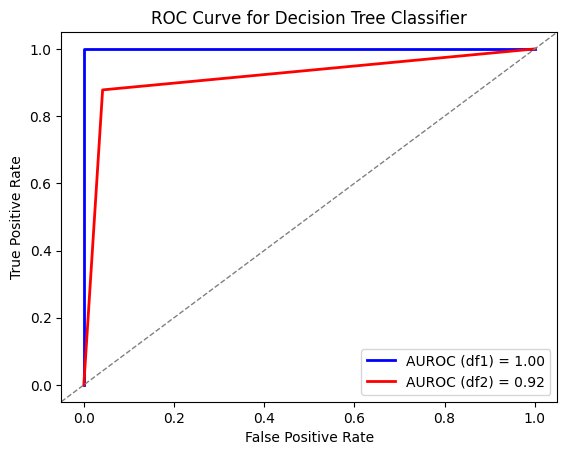

In [131]:
# saving the predicted probabilities via applying the above defined decision function
df1_Y_pred_prob = np.array([decision_function(x, df1_classifier.root)[1] for x in df1_X_test])
df2_Y_pred_prob = np.array([decision_function(x, df2_classifier.root)[1] for x in df2_X_test])

# calculating ROC curve
fpr_df1, tpr_df1, thresholds_df1 = roc_curve(df1_Y_true, df1_Y_pred_prob)
fpr_df2, tpr_df2, thresholds_df2 = roc_curve(df2_Y_true, df2_Y_pred_prob)

# calculating ROC AUC
roc_auc_df1 = roc_auc_score(df1_Y_true, df1_Y_pred_prob)
roc_auc_df2 = roc_auc_score(df2_Y_true, df2_Y_pred_prob)

# plotting ROC curves
plt.plot(fpr_df1, tpr_df1, "b-", lw=2, label="AUROC (df1) = %0.2f" % roc_auc_df1)
plt.plot(fpr_df2, tpr_df2, "r-", lw=2, label="AUROC (df2) = %0.2f" % roc_auc_df2)

# adding a diagonal dashed line for reference
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')

# setting the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="best")

# saving & showing the plot
plt.savefig("roc_curve_decision_tree.png", bbox_inches='tight', dpi=300)
plt.show()

In [132]:
# to compute a rough feature importance
def count_feature_usage(tree, feature_counts):
    ''' function to count the number of times features are used in non-leaf nodes'''
    if tree is not None and tree.value is None:
        feature_index = tree.feature_index
        feature_counts[feature_index] += 1
        count_feature_usage(tree.left, feature_counts)
        count_feature_usage(tree.right, feature_counts)

# for Age Prediction Dataset
num_features = len(df1_X_train[0])
feature_counts = [0] * num_features  # Initialize feature counts
count_feature_usage(df1_classifier.root, feature_counts)

# get the top 5 most important features
top_5_features = sorted(range(len(feature_counts)), key=lambda i: feature_counts[i], reverse=True)[:5]

feature_names = df1_normalized_df.columns.tolist()
top_5_feature_names = [feature_names[i] for i in top_5_features]

print("Top 5 Most Important Features in the Age Prediction Dataset:", top_5_features)
print("Which are:", top_5_feature_names)

# for Breast Cancer Prediction Dataset
num_features = len(df2_X_train[0])
feature_counts = [0] * num_features  # Initialize feature counts
count_feature_usage(df2_classifier.root, feature_counts)

# get the top 5 most important features
top_5_features = sorted(range(len(feature_counts)), key=lambda i: feature_counts[i], reverse=True)[:5]

feature_names = df2_normalized_df.columns.tolist()
top_5_feature_names = [feature_names[i] for i in top_5_features]

print("Top 5 Most Important Features in the Breast Cancer Prediction Dataset:", top_5_features)
print("Which are:", top_5_feature_names)

Top 5 Most Important Features in the Age Prediction Dataset: [0, 1, 2, 3, 4]
Which are: ['AGE', 'AGE_FL', 'GENDER', ' ACTIVITY_LVL', 'BMI']
Top 5 Most Important Features in the Breast Cancer Prediction Dataset: [0, 1, 5, 6, 2]
Which are: ['Class', 'Clump_thickness', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Uniformity_of_cell_size']


#Comparing the Models: KNN vs. DT

Now that we have examined the ROC curves for both models on the datasets we will plot them on one figure for comparison purposes.

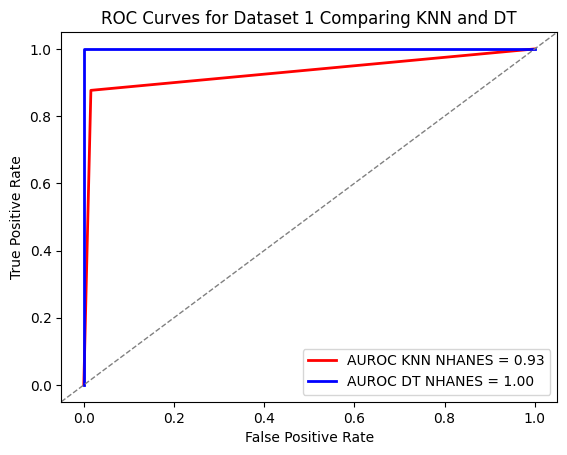

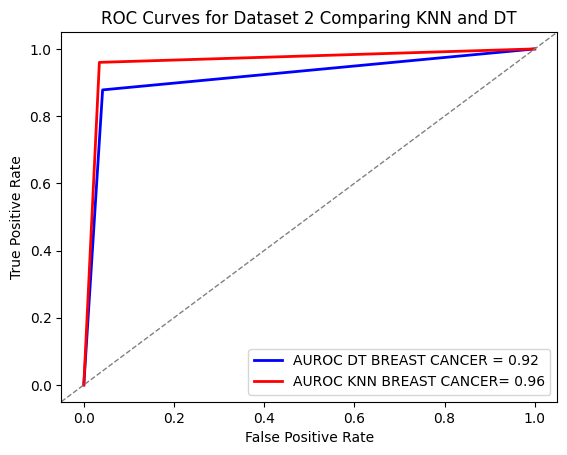

In [133]:
#FIGURE FOR NHANES DATASET 1 =============================
plt.figure()
plt.clf()
plt.plot(fpr_age, tpr_age, "r-", lw=2, label="AUROC KNN NHANES = %0.2f"%roc_auc_age)
plt.plot(fpr_df1, tpr_df1, "b-", lw=2, label="AUROC DT NHANES = %0.2f" % roc_auc_df1)

plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Dataset 1 Comparing KNN and DT')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)

#FIGURE FOR WISCONSIN BREAST CANCER DATASET 2 ====================
# plotting ROC curves
plt.figure()
plt.clf()
plt.plot(fpr_df2, tpr_df2, "b-", lw=2, label="AUROC DT BREAST CANCER = %0.2f" % roc_auc_df2)
plt.plot(fpr_bc, tpr_bc, "r-", lw=2, label="AUROC KNN BREAST CANCER= %0.2f"%roc_auc_bc)
# adding a diagonal dashed line for reference
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')

# setting the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Dataset 2 Comparing KNN and DT')
plt.legend(loc="best")

# saving & showing the plot
plt.savefig("roc_curve_decision_tree.png", bbox_inches='tight', dpi=300)
plt.show()